# Exploring Adventureworks Sales Data with SQL

In [2]:
%python

spark.sql("DROP TABLE IF EXISTS awproducttable")

sql = '''
CREATE TABLE awproducttable USING CSV OPTIONS (path "FileStore/tables/AWProduct.csv", header "true", inferSchema="true")
'''

spark.sql(sql)

Out[7]: DataFrame[]

In [3]:
spark.sql('DESCRIBE awproducttable').show()

+--------------------+---------+-------+
 col_name|data_type|comment|
+--------------------+---------+-------+
 ProductKey| int| null|
 ProductAlternateKey| string| null|
ProductSubcategor...| string| null|
WeightUnitMeasure...| string| null|
 SizeUnitMeasureCode| string| null|
 ProductName| string| null|
 StandardCost| string| null|
 FinishedGoodsFlag| int| null|
 Color| string| null|
 SafetyStockLevel| int| null|
 ReorderPoint| int| null|
 ListPrice| string| null|
 Size| string| null|
 SizeRange| string| null|
 Weight| string| null|
 DaysToManufacture| int| null|
 ProductLine| string| null|
 DealerPrice| string| null|
 Class| string| null|
 Style| string| null|
+--------------------+---------+-------+
only showing top 20 rows

In [4]:
spark.sql('SELECT ProductKey, ProductName, ReorderPoint FROM awproducttable limit 2').show()

+----------+---------------+------------+
ProductKey| ProductName|ReorderPoint|
+----------+---------------+------------+
 1|Adjustable Race| 750|
 2| Bearing Ball| 750|
+----------+---------------+------------+

In [5]:
psdf_product = spark.sql('SELECT ProductKey, ProductName, ReorderPoint FROM awproducttable')

psdf_product.select('ProductName').filter('ReorderPoint < 800').show()

+--------------------+
 ProductName|
+--------------------+
 Adjustable Race|
 Bearing Ball|
 BB Ball Bearing|
Headset Ball Bear...|
 Blade|
 LL Crankarm|
 ML Crankarm|
 HL Crankarm|
 Chainring Bolts|
 Chainring Nut|
 Chainring|
 Crown Race|
 Chain Stays|
 Decal 1|
 Decal 2|
 Down Tube|
 Mountain End Caps|
 Road End Caps|
 Touring End Caps|
 Fork End|
+--------------------+
only showing top 20 rows

In [6]:
ppdf_product = psdf_product.toPandas()
type(ppdf_product)

Out[26]: pandas.core.frame.DataFrame

In [7]:
%sql select * from awproducttable limit 2

ProductKey ProductAlternateKey ProductSubcategoryKey WeightUnitMeasureCode SizeUnitMeasureCode ProductName StandardCost FinishedGoodsFlag Color SafetyStockLevel ReorderPoint ListPrice Size SizeRange Weight DaysToManufacture ProductLine DealerPrice Class Style ModelName ProductDescription StartDate EndDate Status 1 AR-5381 NULL NULL NULL Adjustable Race NULL 0 NA 1000 750 NULL NULL NA NULL 0 NULL NULL NULL NULL NULL NULL 2003-07-01T00:00:00.000+0000 NULL Current 2 BA-8327 NULL NULL NULL Bearing Ball NULL 0 NA 1000 750 NULL NULL NA NULL 0 NULL NULL NULL NULL NULL NULL 2003-07-01T00:00:00.000+0000 NULL Current

### Use a magic when you use a language that is not the default.

In [9]:
spark.sql('SHOW TABLES').show()

+--------+--------------------+-----------+
database| tableName|isTemporary|
+--------+--------------------+-----------+
 default| adult| false|
 default| awcustomer| false|
 default| awinternetsales| false|
 default| awproduct| false|
 default| awproduct123| false|
 default| awproductcategory| false|
 default|awproductsubcategory| false|
 default| awproducttable| false|
 default| awproducttable2| false|
 default| awsalesterritory| false|
 default| birthwt| false|
 default| books| false|
 default| customer| false|
 default| diabetes_csv| false|
 default| diamonds| false|
 default| dimdate| false|
 default| mytable2| false|
 default| productfixedinput| false|
 default| productfixedtable| false|
 default| productinfo| false|
+--------+--------------------+-----------+
only showing top 20 rows

## Load more tables...

#### Beware of lazy evaluation...

In [12]:
%python

spark.sql("DROP TABLE IF EXISTS AWCustomer")

sql = '''
CREATE TABLE AWCustomer USING CSV OPTIONS (path "FileStore/tables/AWCustomer.csv", header "true", inferSchema="true")
'''

spark.sql(sql)

spark.sql('SELECT COUNT(*) FROM AWCustomer').show()

+--------+
count(1)|
+--------+
 18484|
+--------+

In [13]:
%python

spark.sql("DROP TABLE IF EXISTS AWProductSubCategory")
# ProductSubcategoryKey,ProductCategory,ProductSubcategoryName

sql = '''
CREATE TABLE AWProductSubCategory (ProductSubcategoryKey int, ProductCategory string, ProductSubcategoryName string) 
USING CSV OPTIONS (path "FileStore/tables/AWProductSubcategory.csv", header "true", inferSchema="false")
'''

spark.sql(sql)

spark.sql('SELECT "AWProductSubCategory", COUNT(*) FROM AWProductSubCategory').show()

+--------------------+--------+
AWProductSubCategory|count(1)|
+--------------------+--------+
AWProductSubCategory| 37|
+--------------------+--------+

In [14]:
%fs ls FileStore/tables/

path name size dbfs:/FileStore/tables/AWCustomer-1.csv AWCustomer-1.csv 4698932 dbfs:/FileStore/tables/AWCustomer.csv AWCustomer.csv 4698932 dbfs:/FileStore/tables/AWInternetSales-1.csv AWInternetSales-1.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-2.csv AWInternetSales-2.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-3.csv AWInternetSales-3.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-4.csv AWInternetSales-4.csv 11721072 dbfs:/FileStore/tables/AWInternetSales.csv AWInternetSales.csv 11721072 dbfs:/FileStore/tables/AWProduct-1.csv AWProduct-1.csv 152149 dbfs:/FileStore/tables/AWProduct-2.csv AWProduct-2.csv 152149 dbfs:/FileStore/tables/AWProduct-3.csv AWProduct-3.csv 152149 dbfs:/FileStore/tables/AWProduct.csv AWProduct.csv 152149 dbfs:/FileStore/tables/AWProductSubcategory-1.csv AWProductSubcategory-1.csv 958 dbfs:/FileStore/tables/AWProductSubcategory-2.csv AWProductSubcategory-2.csv 958 dbfs:/FileStore/tables/AWProductSubcategory-3.csv AWProductSubcategory-3.csv 958 dbfs:/FileStore/tables/AWProductSubcategory.csv AWProductSubcategory.csv 958 dbfs:/FileStore/tables/AWSalesTerritory-1.csv AWSalesTerritory-1.csv 655899 dbfs:/FileStore/tables/AWSalesTerritory-2.csv AWSalesTerritory-2.csv 655899 dbfs:/FileStore/tables/AWSalesTerritory.csv AWSalesTerritory.csv 655899 dbfs:/FileStore/tables/AdultAmbulatoryCareQualityData.csv AdultAmbulatoryCareQualityData.csv 16532865 dbfs:/FileStore/tables/DepartmentDF.csv/ DepartmentDF.csv/ 0 dbfs:/FileStore/tables/DimAccount.csv DimAccount.csv 6627 dbfs:/FileStore/tables/DimCurrency.csv DimCurrency.csv 2259 dbfs:/FileStore/tables/DimCustomer.csv DimCustomer.csv 4698932 dbfs:/FileStore/tables/DimDate-1.csv DimDate-1.csv 357464 dbfs:/FileStore/tables/DimDate.csv DimDate.csv 357464 dbfs:/FileStore/tables/DimDepartmentGroup.csv DimDepartmentGroup.csv 251 dbfs:/FileStore/tables/DimDepartmentGroupBar.csv DimDepartmentGroupBar.csv 186 dbfs:/FileStore/tables/DimGeography-1.csv DimGeography-1.csv 57275 dbfs:/FileStore/tables/DimGeography.csv DimGeography.csv 57275 dbfs:/FileStore/tables/DimProduct.csv DimProduct.csv 9331738 dbfs:/FileStore/tables/DimProductCategory.csv DimProductCategory.csv 265 dbfs:/FileStore/tables/DimProductCategoryFixedLength.csv DimProductCategoryFixedLength.csv 193 dbfs:/FileStore/tables/DimProductSubcategory.csv DimProductSubcategory.csv 1748 dbfs:/FileStore/tables/DimPromotion.csv DimPromotion.csv 4162 dbfs:/FileStore/tables/DimSalesReason.csv DimSalesReason.csv 338 dbfs:/FileStore/tables/DimSalesTerritory.csv DimSalesTerritory.csv 655899 dbfs:/FileStore/tables/DimeGeography.csv DimeGeography.csv 57275 dbfs:/FileStore/tables/FactInternetSales.csv FactInternetSales.csv 11721072 dbfs:/FileStore/tables/FactInternetSalesReason.csv FactInternetSalesReason.csv 842405 dbfs:/FileStore/tables/awcustomer.csv awcustomer.csv 4698932 dbfs:/FileStore/tables/awproduct.csv awproduct.csv 9331738 dbfs:/FileStore/tables/awproductcategory.csv awproductcategory.csv 265 dbfs:/FileStore/tables/awproductsubcategory.csv awproductsubcategory.csv 1748 dbfs:/FileStore/tables/awsalesterritory.csv awsalesterritory.csv 655899 dbfs:/FileStore/tables/birthwt-1.csv birthwt-1.csv 6210 dbfs:/FileStore/tables/birthwt-2.csv birthwt-2.csv 6210 dbfs:/FileStore/tables/birthwt.csv birthwt.csv 6210 dbfs:/FileStore/tables/booksamplexml.xml booksamplexml.xml 4548 dbfs:/FileStore/tables/diabetes.csv diabetes.csv 23886 dbfs:/FileStore/tables/geo.json/ geo.json/ 0 dbfs:/FileStore/tables/hamlet-1.txt hamlet-1.txt 1444 dbfs:/FileStore/tables/hamlet.txt hamlet.txt 1444 dbfs:/FileStore/tables/image/ image/ 0 dbfs:/FileStore/tables/purchaseorder.xml purchaseorder.xml 3027 dbfs:/FileStore/tables/sales.csv sales.csv 286 dbfs:/FileStore/tables/salesinfo/ salesinfo/ 0 dbfs:/FileStore/tables/spark_logo_hd-ae71b.png spark_logo_hd-ae71b.png 11306 dbfs:/FileStore/tables/storequota.json storequota.json 178 dbfs:/FileStore/tables/storesales.csv storesales.csv 228 dbfs:/FileStore/tables/storesales.json storesales.json 17

In [15]:
%python

spark.sql("DROP TABLE IF EXISTS AWInternetSales")

sql = '''
CREATE TABLE AWInternetSales USING CSV OPTIONS (path "FileStore/tables/AWInternetSales.csv", header "true", inferSchema="true")
'''

spark.sql(sql)

spark.sql('SELECT "AWInternetSales", COUNT(*) as TableCount FROM AWInternetSales').show()

+---------------+----------+
AWInternetSales|TableCount|
+---------------+----------+
AWInternetSales| 60398|
+---------------+----------+

In [16]:
spark.sql('DESCRIBE AWInternetSales').show()

+--------------------+---------+-------+
 col_name|data_type|comment|
+--------------------+---------+-------+
 ProductKey| int| null|
 OrderDateKey| int| null|
 DueDateKey| int| null|
 ShipDateKey| int| null|
 CustomerKey| int| null|
 PromotionKey| int| null|
 CurrencyKey| int| null|
 SalesTerritoryKey| int| null|
 SalesOrderNumber| string| null|
SalesOrderLineNumber| int| null|
 RevisionNumber| int| null|
 OrderQuantity| int| null|
 UnitPrice| double| null|
 ExtendedAmount| double| null|
UnitPriceDiscountPct| int| null|
 DiscountAmount| int| null|
 ProductStandardCost| double| null|
 TotalProductCost| double| null|
 SalesAmount| double| null|
 TaxAmt| double| null|
+--------------------+---------+-------+
only showing top 20 rows

#### Query:

- ProductCategoryKey from dimproductcategory
- ProductSubcategoryKey from dimproductsubcategory
- ProductKey from dimproduct
- EnglishProductCategoryName renamed as Category from dimproductcategory
- EnglishProductSubcategoryName renamed as Subcategory from improductsubcategory
- ModelName as Model from dimproduct

In [18]:
%fs ls /FileStore/tables

path name size dbfs:/FileStore/tables/AWCustomer-1.csv AWCustomer-1.csv 4698932 dbfs:/FileStore/tables/AWCustomer.csv AWCustomer.csv 4698932 dbfs:/FileStore/tables/AWInternetSales-1.csv AWInternetSales-1.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-2.csv AWInternetSales-2.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-3.csv AWInternetSales-3.csv 11721072 dbfs:/FileStore/tables/AWInternetSales-4.csv AWInternetSales-4.csv 11721072 dbfs:/FileStore/tables/AWInternetSales.csv AWInternetSales.csv 11721072 dbfs:/FileStore/tables/AWProduct-1.csv AWProduct-1.csv 152149 dbfs:/FileStore/tables/AWProduct-2.csv AWProduct-2.csv 152149 dbfs:/FileStore/tables/AWProduct-3.csv AWProduct-3.csv 152149 dbfs:/FileStore/tables/AWProduct.csv AWProduct.csv 152149 dbfs:/FileStore/tables/AWProductSubcategory-1.csv AWProductSubcategory-1.csv 958 dbfs:/FileStore/tables/AWProductSubcategory-2.csv AWProductSubcategory-2.csv 958 dbfs:/FileStore/tables/AWProductSubcategory-3.csv AWProductSubcategory-3.csv 958 dbfs:/FileStore/tables/AWProductSubcategory.csv AWProductSubcategory.csv 958 dbfs:/FileStore/tables/AWSalesTerritory-1.csv AWSalesTerritory-1.csv 655899 dbfs:/FileStore/tables/AWSalesTerritory-2.csv AWSalesTerritory-2.csv 655899 dbfs:/FileStore/tables/AWSalesTerritory.csv AWSalesTerritory.csv 655899 dbfs:/FileStore/tables/AdultAmbulatoryCareQualityData.csv AdultAmbulatoryCareQualityData.csv 16532865 dbfs:/FileStore/tables/DepartmentDF.csv/ DepartmentDF.csv/ 0 dbfs:/FileStore/tables/DimAccount.csv DimAccount.csv 6627 dbfs:/FileStore/tables/DimCurrency.csv DimCurrency.csv 2259 dbfs:/FileStore/tables/DimCustomer.csv DimCustomer.csv 4698932 dbfs:/FileStore/tables/DimDate-1.csv DimDate-1.csv 357464 dbfs:/FileStore/tables/DimDate.csv DimDate.csv 357464 dbfs:/FileStore/tables/DimDepartmentGroup.csv DimDepartmentGroup.csv 251 dbfs:/FileStore/tables/DimDepartmentGroupBar.csv DimDepartmentGroupBar.csv 186 dbfs:/FileStore/tables/DimGeography-1.csv DimGeography-1.csv 57275 dbfs:/FileStore/tables/DimGeography.csv DimGeography.csv 57275 dbfs:/FileStore/tables/DimProduct.csv DimProduct.csv 9331738 dbfs:/FileStore/tables/DimProductCategory.csv DimProductCategory.csv 265 dbfs:/FileStore/tables/DimProductCategoryFixedLength.csv DimProductCategoryFixedLength.csv 193 dbfs:/FileStore/tables/DimProductSubcategory.csv DimProductSubcategory.csv 1748 dbfs:/FileStore/tables/DimPromotion.csv DimPromotion.csv 4162 dbfs:/FileStore/tables/DimSalesReason.csv DimSalesReason.csv 338 dbfs:/FileStore/tables/DimSalesTerritory.csv DimSalesTerritory.csv 655899 dbfs:/FileStore/tables/DimeGeography.csv DimeGeography.csv 57275 dbfs:/FileStore/tables/FactInternetSales.csv FactInternetSales.csv 11721072 dbfs:/FileStore/tables/FactInternetSalesReason.csv FactInternetSalesReason.csv 842405 dbfs:/FileStore/tables/awcustomer.csv awcustomer.csv 4698932 dbfs:/FileStore/tables/awproduct.csv awproduct.csv 9331738 dbfs:/FileStore/tables/awproductcategory.csv awproductcategory.csv 265 dbfs:/FileStore/tables/awproductsubcategory.csv awproductsubcategory.csv 1748 dbfs:/FileStore/tables/awsalesterritory.csv awsalesterritory.csv 655899 dbfs:/FileStore/tables/birthwt-1.csv birthwt-1.csv 6210 dbfs:/FileStore/tables/birthwt-2.csv birthwt-2.csv 6210 dbfs:/FileStore/tables/birthwt.csv birthwt.csv 6210 dbfs:/FileStore/tables/booksamplexml.xml booksamplexml.xml 4548 dbfs:/FileStore/tables/diabetes.csv diabetes.csv 23886 dbfs:/FileStore/tables/geo.json/ geo.json/ 0 dbfs:/FileStore/tables/hamlet-1.txt hamlet-1.txt 1444 dbfs:/FileStore/tables/hamlet.txt hamlet.txt 1444 dbfs:/FileStore/tables/image/ image/ 0 dbfs:/FileStore/tables/purchaseorder.xml purchaseorder.xml 3027 dbfs:/FileStore/tables/sales.csv sales.csv 286 dbfs:/FileStore/tables/salesinfo/ salesinfo/ 0 dbfs:/FileStore/tables/spark_logo_hd-ae71b.png spark_logo_hd-ae71b.png 11306 dbfs:/FileStore/tables/storequota.json storequota.json 178 dbfs:/FileStore/tables/storesales.csv storesales.csv 228 dbfs:/FileStore/tables/storesales.json storesales.json 17

In [19]:
sql = '''
CREATE OR REPLACE VIEW vproductinfo as 
SELECT p.ProductKey, s.ProductSubcategoryKey, 
       ProductCategory as Category, 
       ProductSubcategoryName as Subcategory, ModelName as Model
FROM       awproduct                                      p
INNER JOIN awproductsubcategory                           s
ON (p.ProductSubcategoryKey = s.ProductSubcategoryKey)
WHERE p.Status = 'Current' OR p.Status = 'NULL' 
'''

spark.sql('SELECT * FROM vproductinfo').show(3)

+----------+---------------------+-----------+-----------+-------------+
ProductKey|ProductSubcategoryKey| Category|Subcategory| Model|
+----------+---------------------+-----------+-----------+-------------+
 210| 14| Components|Road Frames|HL Road Frame|
 211| 14| Components|Road Frames|HL Road Frame|
 212| 31|Accessories| Helmets| Sport-100|
+----------+---------------------+-----------+-----------+-------------+
only showing top 3 rows

## Create a SQL view named vsalesinfo that contains the followig data.
- SalesAmount from factinternetsales
- All the columns from vproductinfo (the view we created earlier)
- from dimcustomer, get EnglishEductionLevel renamed as Education
- from dimcustomer, get Gender
- from dimcustomer, get YearlyIncome as Salary
- from dimcustomer, if the customer has any children (NumberChildrenAtHome > 0), set to 'Y', else set to 'N' and call this column 'HasChildren'
- from dimcustomer, get HomeOwnerFlag as HomeOwner
- from dimcustomer, AgeBand as 
``` 
CASE  WHEN age < 18 then 'Minor'
                       WHEN age between 19 and 29 then 'Young'
                       WHEN age between 30 and 39 then 'Middle'
                       WHEN age between 40 and 49 then 'Late Middle'
                       WHEN age > 50 then 'Golden'
                       ELSE 'Other' END as AgeBand"
```

In [21]:

sql = '''
CREATE OR REPLACE VIEW vcustomer as
SELECT CustomerKey, GeographyKey, Gender,  YearlyIncome, BirthDate, TotalChildren,
       NumberChildrenAtHome, EnglishEducation as Education, HouseOwnerFlag, 
       NumberCarsOwned, DateFirstPurchase, EnglishOccupation as Occupation, 
       CommuteDistance, int((DATEDIFF(CURRENT_DATE, birthdate))/365) as Age 
FROM awcustomer
'''

spark.sql('select * from vcustomer limit 5').show(3)

+-----------+------------+------+------------+-------------------+-------------+--------------------+---------+--------------+---------------+-------------------+------------+---------------+---+
CustomerKey|GeographyKey|Gender|YearlyIncome| BirthDate|TotalChildren|NumberChildrenAtHome|Education|HouseOwnerFlag|NumberCarsOwned| DateFirstPurchase| Occupation|CommuteDistance|Age|
+-----------+------------+------+------------+-------------------+-------------+--------------------+---------+--------------+---------------+-------------------+------------+---------------+---+
 11000| 26| M| 90000.0|1971-10-06 00:00:00| 2| 0|Bachelors| 1| 0|2011-01-19 00:00:00|Professional| 1-2 Miles| 49|
 11001| 37| M| 60000.0|1976-05-10 00:00:00| 3| 3|Bachelors| 0| 1|2011-01-15 00:00:00|Professional| 0-1 Miles| 44|
 11002| 31| M| 60000.0|1971-02-09 00:00:00| 3| 3|Bachelors| 1| 1|2011-01-07 00:00:00|Professional| 2-5 Miles| 49|
+-----------+------------+------+------------+-------------------+-------------+--------------------+---------+--------------+---------------+-------------------+------------+---------------+---+
only showing top 3 rows

In [22]:
%sql
DESCRIBE TABLE awinternetsales

In [23]:
%sql
DESCRIBE dimdate

In [24]:
sql = '''
CREATE OR REPLACE VIEW vsalesinfo as 
SELECT  OrderDateKey, DueDateKey, s.CustomerKey, PromotionKey, SalesTerritoryKey,
        SalesAmount, vp.*, Gender, YearlyIncome as Salary, OrderQuantity, DiscountAmount, TotalProductCost, TaxAmt, 
        CASE WHEN NumberChildrenAtHome > 0 THEN 'Y' ELSE 'N' END as HasChildren, HouseOwnerFlag as HomeOwner, 
        CASE WHEN Age < 18 THEN 'Minor' WHEN Age BETWEEN 19 AND 29 THEN 'Young' WHEN Age BETWEEN 30 AND 39 THEN 'Middle' 
        WHEN Age BETWEEN 40 AND 49 THEN 'Late Middle' WHEN Age > 50 THEN 'Golden' ELSE 'Other' END as AgeBand, 
        vc.Education, vc.NumberCarsOwned, vc.CommuteDistance,
        d.FiscalYear, d.FiscalQuarter, d.EnglishMonthName as Month, MonthNumberOfYear, d.CalendarYear
FROM awinternetsales                 s
INNER JOIN vcustomer                 vc
ON (s.CustomerKey = vc.CustomerKey)
INNER JOIN vproductinfo              vp
ON (s.ProductKey = vp.ProductKey)
INNER JOIN dimdate                    d
ON (s.OrderDateKey = d.DateKey)

'''

spark.sql(sql)

display(spark.sql('select * from vsalesinfo limit 5'))  #  display() is a Databricks only function!!!

OrderDateKey DueDateKey CustomerKey PromotionKey SalesTerritoryKey SalesAmount ProductKey ProductSubcategoryKey Category Subcategory Model Gender Salary OrderQuantity DiscountAmount TotalProductCost TaxAmt HasChildren HomeOwner AgeBand Education NumberCarsOwned CommuteDistance FiscalYear FiscalQuarter Month MonthNumberOfYear CalendarYear 20121230 20130111 25086 1 4 24.49 463 20 Clothing Gloves Half-Finger Gloves F 60000.0 1 0 9.1593 1.9592 N 1 Golden Partial College 1 2-5 Miles 2012 2 December 12 2012 20130101 20130113 23105 1 9 24.49 463 20 Clothing Gloves Half-Finger Gloves M 40000.0 1 0 9.1593 1.9592 N 0 Golden Partial High School 2 5-10 Miles 2012 3 January 1 2013 20130103 20130115 16944 1 8 24.49 463 20 Clothing Gloves Half-Finger Gloves M 20000.0 1 0 9.1593 1.9592 N 1 Golden Bachelors 0 0-1 Miles 2012 3 January 1 2013 20130105 20130117 22432 1 8 24.49 463 20 Clothing Gloves Half-Finger Gloves F 10000.0 1 0 9.1593 1.9592 Y 1 Late Middle High School 0 0-1 Miles 2012 3 January 1 2013 20130111 20130123 21349 1 6 24.49 463 20 Clothing Gloves Half-Finger Gloves M 70000.0 1 0 9.1593 1.9592 N 0 Golden Graduate Degree 2 1-2 Miles 2012 3 January 1 2013

In [25]:
spark.sql('DESCRIBE TABLE vsalesinfo').show()

+--------------------+---------+-------+
 col_name|data_type|comment|
+--------------------+---------+-------+
 OrderDateKey| int| null|
 DueDateKey| int| null|
 CustomerKey| int| null|
 PromotionKey| int| null|
 SalesTerritoryKey| int| null|
 SalesAmount| double| null|
 ProductKey| int| null|
ProductSubcategor...| int| null|
 Category| string| null|
 Subcategory| string| null|
 Model| string| null|
 Gender| string| null|
 Salary| double| null|
 OrderQuantity| int| null|
 DiscountAmount| int| null|
 TotalProductCost| double| null|
 TaxAmt| double| null|
 HasChildren| string| null|
 HomeOwner| int| null|
 AgeBand| string| null|
+--------------------+---------+-------+
only showing top 20 rows

In [26]:
sql = '''
SELECT Category, Gender, CAST(sum(SalesAmount) as int) as TotalSales
FROM vsalesinfo
GROUP BY Category, Gender
ORDER BY sum(SalesAmount) desc
'''

spark.sql(sql).show()

+-----------+------+----------+
 Category|Gender|TotalSales|
+-----------+------+----------+
 Bikes| F| 14297238|
 Bikes| M| 14020906|
Accessories| M| 351193|
Accessories| F| 349566|
 Clothing| M| 172959|
 Clothing| F| 166813|
+-----------+------+----------+

In [27]:
ppdf_salesbygender = spark.sql(sql).toPandas()
type(ppdf_salesbygender)

Out[27]: pandas.core.frame.DataFrame

In [28]:
ppdf_salesbygender.head()

Category 
 Gender 
 TotalSales 
 
 
 
 
 0 
 Bikes 
 F 
 14297238 
 
 
 1 
 Bikes 
 M 
 14020906 
 
 
 2 
 Accessories 
 M 
 351193 
 
 
 3 
 Accessories 
 F 
 349566 
 
 
 4 
 Clothing 
 M 
 172959

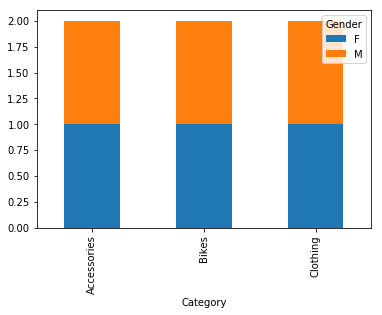

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

ppdf_salesbygender.groupby(['Category','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## Databricks only features used to demonstrate SQL

In [31]:
%sql
WITH cte_check_months as
(
SELECT FiscalYear, MonthNumberOfYear, COUNT(*) as NumSales
FROM vsalesinfo
GROUP BY  FiscalYear, MonthNumberOfYear
ORDER BY  FiscalYear, MonthNumberOfYear
)

SELECT FiscalYear, COUNT(*) as Count, SUM(NumSales)
FROM cte_check_months
GROUP BY FiscalYear
ORDER BY FiscalYear

FiscalYear Count sum(NumSales) 2010 6 999 2011 12 2699 2012 12 24534 2013 7 32166

In [32]:
%sql
SELECT Education, Category, SUM(SalesAmount) as TotalSales, AVG(SalesAmount) as AverageSales
FROM vsalesinfo
GROUP BY Category, Education 

Education Category TotalSales AverageSales Partial College Bikes 7438685.534800144 1784.713420057616 Graduate Degree Accessories 121207.35000000132 19.46480648787559 High School Bikes 4459604.9086000435 1901.7504940725132 High School Clothing 56689.13000000006 36.199955300127755 Graduate Degree Clothing 62927.10000000028 38.04540507859751 Graduate Degree Bikes 5276425.8013000665 1938.437105547416 Bachelors Accessories 205562.25999999902 19.953626480294993 Bachelors Bikes 9592079.177100176 1876.3848155516775 Partial High School Bikes 1551349.2288999977 1808.0993343822815 Partial High School Accessories 60400.3000000005 18.993805031446698 High School Accessories 121732.03000000128 18.99391948821989 Partial College Accessories 191858.01999999827 19.235815119310033 Partial College Clothing 92999.33000000103 37.484615074567124 Bachelors Clothing 102501.32000000123 37.546271062271515 Partial High School Clothing 24655.7299999999 36.799597014925226

In [33]:
%sql
with cte_countrycodes as
(
SELECT salesterritorykey,
       CASE SalesTerritoryCountry WHEN 'United States' THEN 'USA' WHEN 'United Kingdom' THEN 'GBR' WHEN 'Canada' THEN 'CAN' 
       WHEN 'France' THEN 'FRA' WHEN 'Australia' THEN 'AUS' WHEN 'Germany' THEN 'DEU' ELSE 'NA' END as CountryCD
from awsalesterritory t
)

SELECT CountryCD, SalesAmount
FROM vsalesinfo       s
JOIN cte_countrycodes t
ON (s.salesterritorykey = t.salesterritorykey)
WHERE CountryCD <> "NA"

CountryCD SalesAmount CAN 3578.27 FRA 3399.99 USA 3399.99 USA 699.0982 AUS 3399.99 USA 3578.27 AUS 3578.27 AUS 3374.99 AUS 3399.99 USA 3578.27 USA 3578.27 GBR 699.0982 AUS 3578.27 AUS 3578.27 USA 3578.27 DEU 3578.27 USA 3578.27 GBR 3578.27 AUS 3578.27 AUS 3578.27 AUS 699.0982 USA 3578.27 USA 3578.27 DEU 3578.27 GBR 3578.27 GBR 3578.27 USA 699.0982 AUS 3578.27 DEU 3578.27 USA 699.0982 AUS 3578.27 USA 3578.27 GBR 3399.99 USA 3399.99 AUS 3578.27 AUS 3374.99 USA 3578.27 USA 3578.27 AUS 3578.27 AUS 3399.99 DEU 3578.27 FRA 3578.27 GBR 3578.27 AUS 3578.27 USA 3578.27 GBR 3578.27 AUS 3399.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 USA 3578.27 USA 3578.27 USA 3578.27 FRA 3578.27 FRA 3578.27 DEU 3578.27 AUS 3578.27 USA 3578.27 USA 3578.27 GBR 699.0982 AUS 3374.99 USA 3578.27 DEU 3578.27 AUS 3578.27 AUS 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 AUS 3399.99 AUS 3578.27 AUS 3374.99 USA 3578.27 CAN 3578.27 USA 3578.27 USA 699.0982 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3399.99 DEU 3578.27 AUS 3578.27 AUS 3399.99 AUS 699.0982 FRA 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 USA 3578.27 FRA 3578.27 FRA 3578.27 DEU 3399.99 GBR 3374.99 USA 3374.99 USA 3399.99 AUS 3578.27 AUS 3578.27 AUS 3399.99 AUS 3399.99 USA 3578.27 FRA 699.0982 AUS 3578.27 AUS 3578.27 AUS 3578.27 CAN 3578.27 GBR 3578.27 FRA 3578.27 CAN 3578.27 GBR 3578.27 USA 699.0982 AUS 3578.27 FRA 3578.27 DEU 3578.27 AUS 3578.27 AUS 3399.99 AUS 3399.99 USA 3578.27 FRA 3374.99 USA 3374.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3399.99 USA 3578.27 USA 3578.27 USA 3578.27 GBR 699.0982 USA 699.0982 AUS 3578.27 AUS 3374.99 AUS 699.0982 USA 3578.27 USA 3578.27 AUS 3578.27 AUS 3374.99 GBR 3578.27 CAN 3578.27 FRA 3374.99 CAN 3374.99 CAN 699.0982 AUS 3374.99 USA 3578.27 USA 3578.27 FRA 699.0982 DEU 3578.27 AUS 3578.27 CAN 3578.27 FRA 3578.27 USA 3578.27 AUS 3578.27 DEU 3578.27 USA 3578.27 FRA 3578.27 AUS 3578.27 AUS 3374.99 AUS 3578.27 AUS 3578.27 AUS 699.0982 USA 3578.27 DEU 3578.27 AUS 3578.27 AUS 3399.99 AUS 3399.99 GBR 699.0982 USA 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 699.0982 GBR 3578.27 AUS 3578.27 USA 699.0982 AUS 3399.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3399.99 USA 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 GBR 699.0982 GBR 3578.27 GBR 3578.27 AUS 3399.99 USA 3578.27 AUS 3578.27 AUS 3374.99 AUS 3374.99 USA 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 AUS 3374.99 AUS 3399.99 USA 3578.27 USA 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 CAN 3578.27 USA 3578.27 GBR 3578.27 DEU 3578.27 USA 3578.27 AUS 3578.27 USA 3578.27 USA 699.0982 AUS 3374.99 AUS 3578.27 AUS 699.0982 USA 3578.27 DEU 3578.27 DEU 3578.27 USA 3578.27 USA 3578.27 GBR 3399.99 USA 3578.27 USA 3399.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 USA 3578.27 CAN 3578.27 USA 3578.27 USA 3578.27 AUS 3374.99 USA 3578.27 USA 3578.27 USA 3578.27 USA 699.0982 DEU 699.0982 USA 3578.27 CAN 699.0982 AUS 3578.27 AUS 699.0982 USA 3578.27 USA 3578.27 GBR 3578.27 DEU 3578.27 AUS 3374.99 AUS 3578.27 USA 3578.27 GBR 3578.27 GBR 3374.99 USA 3578.27 USA 3374.99 AUS 3578.27 AUS 3578.27 AUS 3374.99 CAN 3578.27 CAN 3374.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 CAN 3578.27 AUS 3578.27 AUS 3374.99 FRA 3578.27 GBR 3578.27 GBR 3399.99 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 699.0982 USA 3399.99 FRA 699.0982 AUS 3374.99 AUS 3578.27 GBR 3578.27 GBR 3578.27 GBR 3578.27 FRA 3399.99 USA 3578.27 USA 3399.99 AUS 3578.27 DEU 3578.27 AUS 3578.27 GBR 3578.27 AUS 3578.27 DEU 699.0982 DEU 3578.27 DEU 3578.27 DEU 3578.27 USA 699.0982 AUS 3374.99 AUS 3578.27 AUS 699.0982 USA 3578.27 USA 3578.27 GBR 3399.99 CAN 3578.27 USA 3578.27 USA 3399.99 AUS 3578.27 DEU 3578.27 FRA 3374.99 CAN 3374.99 AUS 3578.27 AUS 3578.27 AUS 3374.99 GBR 3578.27 USA 3578.27 CAN 3578.27 AUS 3578.27 GBR 3578.27 GBR 3578.27 FRA 3578.27 DEU 3578.27 CAN 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 AUS 3578.27 USA 3578.27 AUS 3578.27 AUS 3578.27 AUS 699.0982 GBR 3399.99 USA 3578.27 USA 3578.27 USA 3578.27 USA 3399.99 AUS 3578.27 DEU 3578.27 USA 3578.27 USA 3578.2